In [1]:
import numpy as np
import math as m
from matplotlib import pyplot as plt
from scipy import integrate

In [12]:
y_0=np.array([0.994,0,0,-2.00158510637908252240537862224])
points = 20000
t = np.linspace(0,17.1,points)

In [3]:
def f(t,y):
    mu=0.012277471
    mu_0=1-mu
    r_1=m.sqrt((y[0]+mu)**2+y[1]**2)
    r_2=m.sqrt((y[0]-mu_0)**2+y[1]**2)
    dx=2*y[3]+y[0]-mu_0*(y[0]+mu)/(r_1**3)-mu*(y[0]-mu_0)/(r_2**3)
    dy=-2*y[2]+y[1]-mu_0*y[1]/(r_1**3)-mu*y[1]/(r_2**3)
    return np.array([y[2],y[3],dx,dy])

In [4]:
def RK_method(f,y_0,t):
    y = np.zeros([len(t),4])
    y[0] = y_0
    for i in range(0,len(t)-1):
        h = t[i+1]-t[i]
        F1 = f(t[i],y[i])
        F2 = f((t[i]+h/2),(y[i]+F1*h/2))
        F3 = f((t[i]+h/2),(y[i]+F2*h/2))
        F4 = f((t[i]+h),(y[i]+F3*h))
        y[i+1] = y[i] + h/6*(F1 + 2*F2 + 2*F3 + F4)
    return y.transpose()

In [15]:
y_RK = RK_method(f,y_0,t)

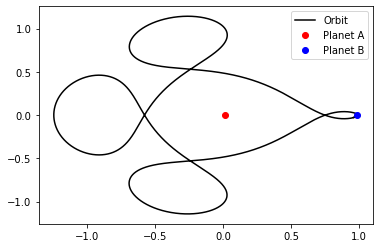

In [16]:
mu=0.012277471
plt.plot(y_RK[0],y_RK[1],'k-', label = "Orbit")
plt.plot(mu,0,'ro',label="Planet A")
plt.plot(1-mu,0,'bo',label="Planet B")
plt.legend()

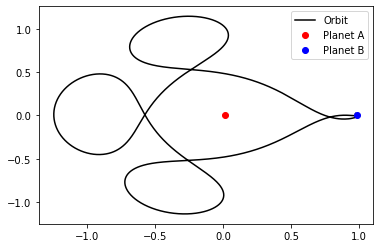

In [7]:
solution=integrate.solve_ivp(f,[0,17.1],y_0,max_step=0.01,atol=10e-7)
plt.plot(solution.y[0],solution.y[1],'k-',label = "Orbit")
plt.plot(mu,0,'ro',label="Planet A")
plt.plot(1-mu,0,'bo',label="Planet B")
plt.legend()

In [8]:
len(solution.y[0])

1725